In [1]:
import pandas as pd
import os
# import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
import numpy as np
from scipy.optimize import curve_fit


In [2]:
dir_1_path = "D:\新传数据挖掘比赛\数据集\数据集\选题二训练集：热点事件的发展趋势预测\数据"
files = os.listdir(dir_1_path)

In [3]:
sample_1 = os.path.join(dir_1_path,files[0])
sample_2 = os.path.join(dir_1_path,files[1])

df_sample_1 = pd.read_excel(sample_1)
df_sample_2 = pd.read_excel(sample_2)
data_1 = df_sample_1.values
data_2 = df_sample_2.values

In [4]:
df_sample_2

,检索ID,标题/微博内容,全文内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,10,//@手起刀落西江月://@nusssuii:多少？？？//@ssstarriest:？//...,//@手起刀落西江月://@nusssuii:多少？？？//@ssstarriest:？//...,0,0,0,4a0d3c5f9a75b798d2a4b75d5e89ea80,998,405,河南
1,10,转发C,"转发C【原C】【唐山""雷霆风暴""专项行动落幕，有结果了吗？】唐山市""雷霆风暴""专项行动，昨日...",0,0,0,b5d8d5c7ae69b3b5936cdf5d308bb476,202,1412,甘肃
2,10,公安部发布A级通缉令，公开通缉拐卖儿童犯罪嫌疑人陈艳。有线索请立即向公安机关举报！#刑侦奋战...,公安部发布A级通缉令，公开通缉拐卖儿童犯罪嫌疑人陈艳。有线索请立即向公安机关举报！#刑侦奋战...,0,0,0,bfd8a8259973fe12cae87e8b2c5d2d32,59418,1540,陕西
3,10,致敬[作揖]//@说给玫瑰开荒中:致敬🫡,致敬[作揖]//@说给玫瑰开荒中:致敬🫡【原C】#王一博致敬每一位人民警察#【致敬排爆手[心...,0,0,0,6261b818dc9a5677c18f5c700b875205,114,541,四川
4,10,看到了希望 能不能公布一下 那四个女孩的情况。,看到了希望 能不能公布一下 那四个女孩的情况。【原C】【#公安部回应唐山烧烤店打人案#：一...,0,0,0,eba7f5f417243ab0b132be1773553e2c,118,617,河北
...,...,...,...,...,...,...,...,...,...,...
995,10,#夏季治安打击整治百日行动#,#夏季治安打击整治百日行动#【原C】【公安机关依法严打制售假药劣药违法犯罪 上半年破获案件一...,0,0,0,484d17352cb8ae03aee99eab072b3338,67280,238,上海
996,10,转发C,转发C【原C】#公安侦破一起传播淫秽物品牟利案#【公安部指挥侦破一起传播淫秽物品牟利案[话筒...,0,0,0,9436521cabb07598e47ab017331f63f6,412,809,北京
997,10,//@杭州公安:【百日行动 | 机场“三维”反诈在行动！】#百日行动#,//@杭州公安:【百日行动 | 机场“三维”反诈在行动！】#百日行动#【原C】【百日行动 |...,0,0,0,ad7467cbff888a002c8aa1e3bb2f76b9,12121,1031,浙江
998,10,转发C,转发C【原C】#百日行动#【警惕！知名网络平台寻“猎” 代办信用卡为“饵”行骗】近日，上海闵...,0,0,0,477290f942b2e1ab13196f33418a3311,645,275,上海


In [5]:
df_sample_1.describe().T

,count,mean,std,min,25%,50%,75%,max
检索ID,1000.0,1.000,0.000000,1.0,1.0,1.0,1.00,1.0
点赞,1000.0,0.000,0.000000,0.0,0.0,0.0,0.00,0.0
转发,1000.0,0.057,1.615042,0.0,0.0,0.0,0.00,51.0
评论,1000.0,0.047,0.353434,0.0,0.0,0.0,0.00,6.0
粉丝数,1000.0,5951.374,66532.298721,0.0,4.0,55.0,323.25,1060174.0
关注数,1000.0,537.238,1271.559874,0.0,62.5,188.0,478.25,19221.0


In [43]:
# 考虑将最多的相同的评论做关键词提取。作为单独一档数据
# 计算离散型变量的统计特征
df_sample_1.describe(include=['O'])
# 非空数量count，唯一值种类unique，出现最多的类型top和出现次数freq
# print("frequenece =", df_sample_1.describe(include=["O"])["标题/微博内容"]["freq"])

# 转发C 转发的评论的数量



,标题/微博内容,全文内容,账号昵称UID加密,地域
count,1000,1000,1000,1000
unique,651,999,976,34
top,转发C,转发C【原C】冬奥会将至，我作为C冰雪大使，邀请大家一起参与2022年北京冬奥会#我是火炬网...,b3f831b4d2e4a0f7ed1bac0e3071e456,广东
freq,313,2,4,147


In [34]:
import re

def extract_keywords(text):
    pattern = r'#([^#]+)#'
    matches = re.findall(pattern, text)
    return matches

# 示例一
text1 = "今天是个好天气#出行#"
keywords1 = extract_keywords(text1)
print(keywords1)  # 输出：['出行']

# 示例二
text2 = "#王一博安踏品牌全球首席代言人# wyb#王一博冰雪运动推广大使# 和安踏和王一博一起看北京冬奥感受中国冰上速度，奥运健儿加油加油，期待你们夺冠那一刻! @UNIQ-王一博 #王一博冬奥文化推广使者# http://t.cn/A6ix7WAH ​​​"
keywords2 = extract_keywords(text2)
print(keywords2)  # 输出：['王一博安踏品牌全球首席代言人', '王一博冰雪运动推广大使', '王一博冬奥文化推广使者']


['出行']
['王一博安踏品牌全球首席代言人', '王一博冰雪运动推广大使', '王一博冬奥文化推广使者']


In [35]:
print("type:",type(df_sample_1.describe(include=['O'])["全文内容"]["top"]))
print(df_sample_1.describe(include=['O'])["全文内容"]["top"])
extract_keywords(df_sample_1.describe(include=['O'])["全文内容"]["top"])

type: <class 'str'>
转发C【原C】冬奥会将至，我作为C冰雪大使，邀请大家一起参与2022年北京冬奥会#我是火炬网络护跑手# 活动。点进活动页面http://t.cn/A6xRrGc5，一键参与火炬护跑，一起为中国冰雪加油！同时我为你们也准备了一道冬奥知识问答，快来说出你的答案，这个冬天，我们一起向未来！ ​​


['我是火炬网络护跑手']

In [26]:
type(df_sample_2.describe().T)
df_sample_2.describe().T
df_sample_2.describe().T["max"]["检索ID"]
df_sample_2.describe()["count"]["检索ID"]   # 评论数量

,检索ID,点赞,转发,评论,粉丝数,关注数
count,1000.0,1000.0,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,10.0,0.0,0.077000,0.096000,2.770999e+04,438.200000
std,0.0,0.0,1.452991,1.143719,1.573146e+05,912.395649
min,10.0,0.0,0.000000,0.000000,0.000000e+00,0.000000
25%,10.0,0.0,0.000000,0.000000,1.000000e+00,30.750000
50%,10.0,0.0,0.000000,0.000000,2.050000e+02,200.000000
75%,10.0,0.0,0.000000,0.000000,3.078000e+03,482.000000
max,10.0,0.0,43.000000,29.000000,2.618855e+06,13700.000000


In [7]:
timeline_data = pd.read_excel("D:\新传数据挖掘比赛\数据集\数据集\选题二训练集：热点事件的发展趋势预测\数据集序号和事件对应表更新热点.xlsx")
timeline_data.head(10)

,序号,事件,热度,起始时间
0,1,北京举办冬奥会冬残奥会,62.84,2022-01-26
1,2,2022年全国高考,54.37,2022-05-14
2,3,国内成品油价格已进行22轮调整,46.03,2022-01-01
3,4,中国空间站建造任务稳步推进,42.78,2022-01-01
4,5,2022年春晚,32.03,2022-01-01
5,6,中小学教师资格考试,27.66,2022-08-16
6,8,家庭教育促进法正式实施,21.82,2022-02-25
7,9,全国开展打击整治养老诈骗专项行动,19.45,2022-04-05
8,10,公安部开展“百日行动”,17.15,2022-06-22
9,11,教育部：确保2022年义务教育招生全面实行划片就近入学,13.32,2022-03-26


In [8]:
timeline_data.describe()

,序号,热度
count,3920.000000,3920.000000
mean,2002.427296,0.619357
std,1156.951956,2.052282
min,1.000000,0.010000
25%,1001.750000,0.150000
50%,2005.500000,0.270000
75%,3005.250000,0.550000
max,4000.000000,62.840000


In [38]:
# 计算离散型统计特征
# 没有重复的热点事件
timeline_data.describe(include=['O'])

,事件
count,3920
unique,3920
top,北京举办冬奥会冬残奥会
freq,1


In [9]:
#type pandas.core.series.Series
Event_Heat = timeline_data["热度"]
Event_Heat_list = Event_Heat.to_list()
Event_Heat.shape
Serial_Number = timeline_data["序号"]

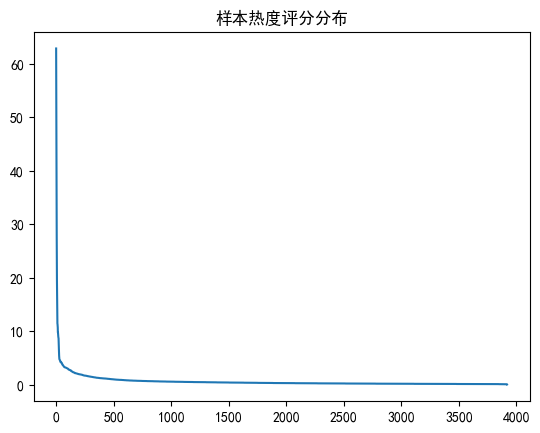

In [10]:
# timeline_data.value_counts('热度').plot(kind='bar')

plt.plot(Event_Heat)

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# plt.title("the score distribution of event heat’s samples")

plt.title("样本热度评分分布")
# print(plt.xticks()) 输出刻度
plt.show()


            5             4             3             2
-3.626e-16 x + 4.016e-12 x - 1.643e-08 x + 3.037e-05 x - 0.0247 x + 7.279


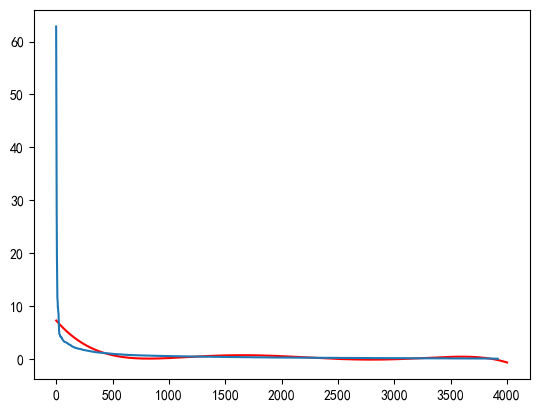

[ 9.15189727e+01 -1.95599664e-02  9.99987844e-01  4.18189887e-01]
a: 91.51897269302582 b: -0.019559966407837887 c: 0.9999878440417859 d: 0.41818988739623153


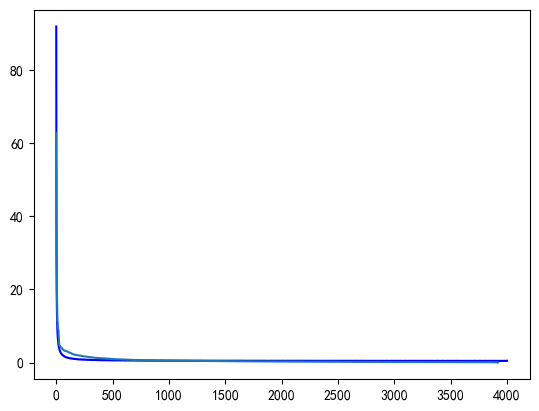

In [11]:
X = np.array(Serial_Number)
Y = np.array(Event_Heat)
# p = plt.plot(X, Y, 'b:')

#多项式拟合
coeff = np.polyfit(X, Y, 5)
coeff
f=np.poly1d(coeff)
print(f)
p = plt.plot(X,f(X),"r")
plt.plot(Event_Heat)
plt.show()


# curve fit 拟合
# 猜测函数
def function_fit(x,a,b,c,d):
    return a/x+b*np.sin(x/c)+d

popt, pcov = curve_fit(function_fit, X, Y)
print(popt)
# print(pcov) 相关矩阵
Y_predict_by_funtion_fit = y4 = [function_fit(i, popt[0], popt[1],popt[2],[popt[3]]) for i in X]
plt.plot(X,Y_predict_by_funtion_fit,"b")

print("a:",popt[0],"b:",popt[1],"c:",popt[2],"d:",popt[3])

plt.plot(Event_Heat)
plt.show()

In [12]:
# predict sample
Y_predict_by_funtion_fit

[array([91.92070331]),
 array([46.1598906]),
 array([30.92175452]),
 array([23.31273671]),
 array([18.74074062]),
 array([15.67681599]),
 array([11.83870994]),
 array([10.57890556]),
 array([9.58073019]),
 array([8.75765626]),
 array([8.05526389]),
 array([7.44988961]),
 array([6.93588266]),
 array([6.50673783]),
 array([6.1437607]),
 array([5.82046488]),
 array([5.51726372]),
 array([5.23204186]),
 array([4.9762794]),
 array([4.75987399]),
 array([4.57832155]),
 array([4.41383061]),
 array([4.0815317]),
 array([3.92323076]),
 array([3.78907666]),
 array([3.68143213]),
 array([3.58700235]),
 array([3.48814707]),
 array([3.37831103]),
 array([3.26736555]),
 array([3.17193395]),
 array([3.0995824]),
 array([3.04140044]),
 array([2.97978383]),
 array([2.90425649]),
 array([2.82077832]),
 array([2.74597594]),
 array([2.69159616]),
 array([2.65347223]),
 array([2.61514417]),
 array([2.5628019]),
 array([2.49780983]),
 array([2.43529557]),
 array([2.39009855]),
 array([2.36299608]),
 array([

In [13]:
timeline_data.values

array([[1, '北京举办冬奥会冬残奥会', 62.84, Timestamp('2022-01-26 00:00:00')],
       [2, '2022年全国高考', 54.37, Timestamp('2022-05-14 00:00:00')],
       [3, '国内成品油价格已进行22轮调整', 46.03, Timestamp('2022-01-01 00:00:00')],
       ...,
       [3998, '成都警方通报“一男一女拦截奥迪车”', 0.06,
        Timestamp('2022-11-11 11:43:51')],
       [3999, '深圳龙岗区引进专精特新企业', 0.05, Timestamp('2022-10-31 14:43:29')],
       [4000, '司机因前车起步晚5秒斗气致1死3伤', 0.01,
        Timestamp('2022-11-07 14:12:16')]], dtype=object)

In [14]:
df_sample_1.columns

Index(['检索ID', '标题/微博内容', '全文内容', '点赞', '转发', '评论', '账号昵称UID加密', '粉丝数', '关注数',
       '地域'],
      dtype='object')

In [15]:
df_sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   检索ID       1000 non-null   int64 
 1   标题/微博内容    1000 non-null   object
 2   全文内容       1000 non-null   object
 3   点赞         1000 non-null   int64 
 4   转发         1000 non-null   int64 
 5   评论         1000 non-null   int64 
 6   账号昵称UID加密  1000 non-null   object
 7   粉丝数        1000 non-null   int64 
 8   关注数        1000 non-null   int64 
 9   地域         1000 non-null   object
dtypes: int64(6), object(4)
memory usage: 78.2+ KB


In [16]:
# 大批量操作请单独写py文件
# #所有数据整合
import time
for file in files:
    single_file = os.path.join(dir_1_path,file)
    df_single_file = pd.read_excel(single_file)
    # print(df_single_file.describe())

    # 对应事件评论数量
    comment_count = df_single_file.describe()["count"]["检索ID"]  
    comment_mode = df_single_file.describe(include=["O"])["标题/微博内容"]["freq"]
    # comment_mode_keywords = extract_keywords(df_single_file.describe(include=['O'])["全文内容"]["top"]) 
    unique_number = df_single_file.describe(include=['O'])["全文内容"]["top"]

    # 热点事件地域分布
    

    df = pd.DataFrame(columns=['检索ID',"事件评论数量",'评论众数', '众数评论关键词',"独特评论数量"])
        
    

In [44]:
# 网络传播热度指数 R 计算公式
def function_hot_R(News_Articles,Posts_Articles,App_Articles,Wechat_Official_Accounts,Government_Articles,Foreign_Media_Articles,Weibo_Numbers,Forum_Numbers,Blog_Amount,Videos_Amount,Other_Websites):
    # 新闻条数 News_Articles
    # 电子报刊条数 Posts_Articles
    # 客户端条数 App_Articles
    # 微信公众号条数 Wechat_Official_Accounts
    # 政务条数 Government_Articles
    # 外媒条数 Foreign_Media_Articles

    # 微博条数 Weibo_Numbers
    # 论坛条数 Forum_Numbers
    # 博客条数 Blog_Amount

    # 视频条数 Videos_Amount

    # 其他网站系数 Other_Websites

    a1 = 1.05
    a2 = 1.001
    a3 = 1.1
    a4 = 1.005
    b1 = 0.4
    b2 = 0.45
    b3 = 0.05
    b4 = 0.1

    X1 = News_Articles*0.189 + Posts_Articles*0.175 + App_Articles*0.187 + Wechat_Official_Accounts*0.182 + Government_Articles*0.167 + Foreign_Media_Articles*0.100
    X2 = Weibo_Numbers*0.319 + Forum_Numbers*0.355 + Blog_Amount*0.326
    X3 = Videos_Amount
    X4 = Other_Websites

    # Y_i = (2/(1+a**(-x))-1)*100
    Y1 = (2/(1+a1**(-X1))-1)*100
    Y2 = (2/(1+a2**(-X2))-1)*100
    Y3 = (2/(1+a3**(-X3))-1)*100
    Y4 = (2/(1+a4**(-X4))-1)*100
    R = Y1*b1 + Y2*b2 + Y3*b3 + Y4*b4
    
    
     
    return R

In [106]:
#test    
    # 新闻条数 News_Articles
    # 电子报刊条数 Posts_Articles
    # 客户端条数 App_Articles
    # 微信公众号条数 Wechat_Official_Accounts
    # 政务条数 Government_Articles
    # 外媒条数 Foreign_Media_Articles
    # 微博条数 Weibo_Numbers
    # 论坛条数 Forum_Numbers
    # 博客条数 Blog_Amount
    # 视频条数 Videos_Amount
    # 其他网站系数 Other_Websites

# function_hot_R(1,1,1,10,1,10,10000,10000,10000,2,1)  # 48.93978926013373

# print(function_hot_R(1,1,1,1,1,1,1,1,1,1,1))     #1.2611314056753375
# print(function_hot_R(0,1,1,1,1,1,1,1,1,1,1))     #1.0767948742689537
# print(function_hot_R(1,0,1,1,1,1,1,1,1,1,1))     #1.0904506815152715
# print(function_hot_R(1,1,0,1,1,1,1,1,1,1,1))     #1.0787457152470203
# print(function_hot_R(1,1,1,0,1,1,1,1,1,1,1))     #1.0836228011561833
# print(function_hot_R(1,1,1,1,0,1,1,1,1,1,1))     #1.0982539158707993
# print(function_hot_R(1,1,1,1,1,0,1,1,1,1,1))     #1.1636035168526249
# print(function_hot_R(1,1,1,1,1,1,0,1,1,1,1))     #1.2539574933155384
# print(function_hot_R(1,1,1,1,1,1,1,0,1,1,1))     #1.2531478981346433
# print(function_hot_R(1,1,1,1,1,1,1,1,0,1,1))     #1.2538000720311304
# print(function_hot_R(1,1,1,1,1,1,1,1,1,0,1))     #1.0230361675800992
# print(function_hot_R(1,1,1,1,1,1,1,1,1,1,0))     #1.2361937498149889

function_hot_R(100,100,100,100,10,10,1000,1000,1000,100,1) 


# 特征 b1 部分占40分，b2占45分，其中b1和b2占最多15分






63.89285147805014